# Graph Lab

## Header information:

  - Author #1: Parisha Nizam (nizamp@mcmaster.ca)
  - Author #2: Jennifer Ye (yej52@mcmaster.ca)
  - Gitlab URL: https://gitlab.cas.mcmaster.ca/nizamp/l1-graph-lab
  - Avenue to Learn group name: Graph 17

In [ ]:
import csv
import matplotlib.pyplot as plt
from GraphObjs import *
from Library.DataExtractor import *
from Library.DictionaryBuilder import * 
from Library.GraphBuilder import * 
from Library.MetricExtractor import *
from PathFinders.PathFinder import * 
from PathFinders.AStar import *
from PathFinders.Dijkstra import *

# Loading Graph


In [ ]:
graph = (GraphBuilder('_dataset/london.connections.csv',['station1','station2','time'],WeightedEdge,'undirected'))

# Compute Metrics

# Distribution of Node's Degree

In [ ]:
import collections

fig, ax = plt.subplots()
G = GraphBuilder('_dataset/london.connections.csv',['station1','station2','time'],WeightedEdge,"undirected")

degrees = [len(G.get_edges(n)) for n in G.get_nodes()]
duplicates = collections.Counter(degrees)
degrees = [f"{value} {key}"
       if value > 0 else key
       for (key, value) in duplicates.items()]

#creating dictionary 
#split output
keys, values = [list(d) for d in zip(*[[int(i) for i in c.split(' ')] for c in degrees])]
zipbObj = zip(values,keys)
# Create a dictionary from zip object
dictOfDegrees = dict(zipbObj)

print(dictOfDegrees)

plt.bar(dictOfDegrees.keys(), dictOfDegrees.values())
plt.xlabel("Degree")
plt.ylabel("Number of nodes with degree")
plt.show()

# Class Diagram

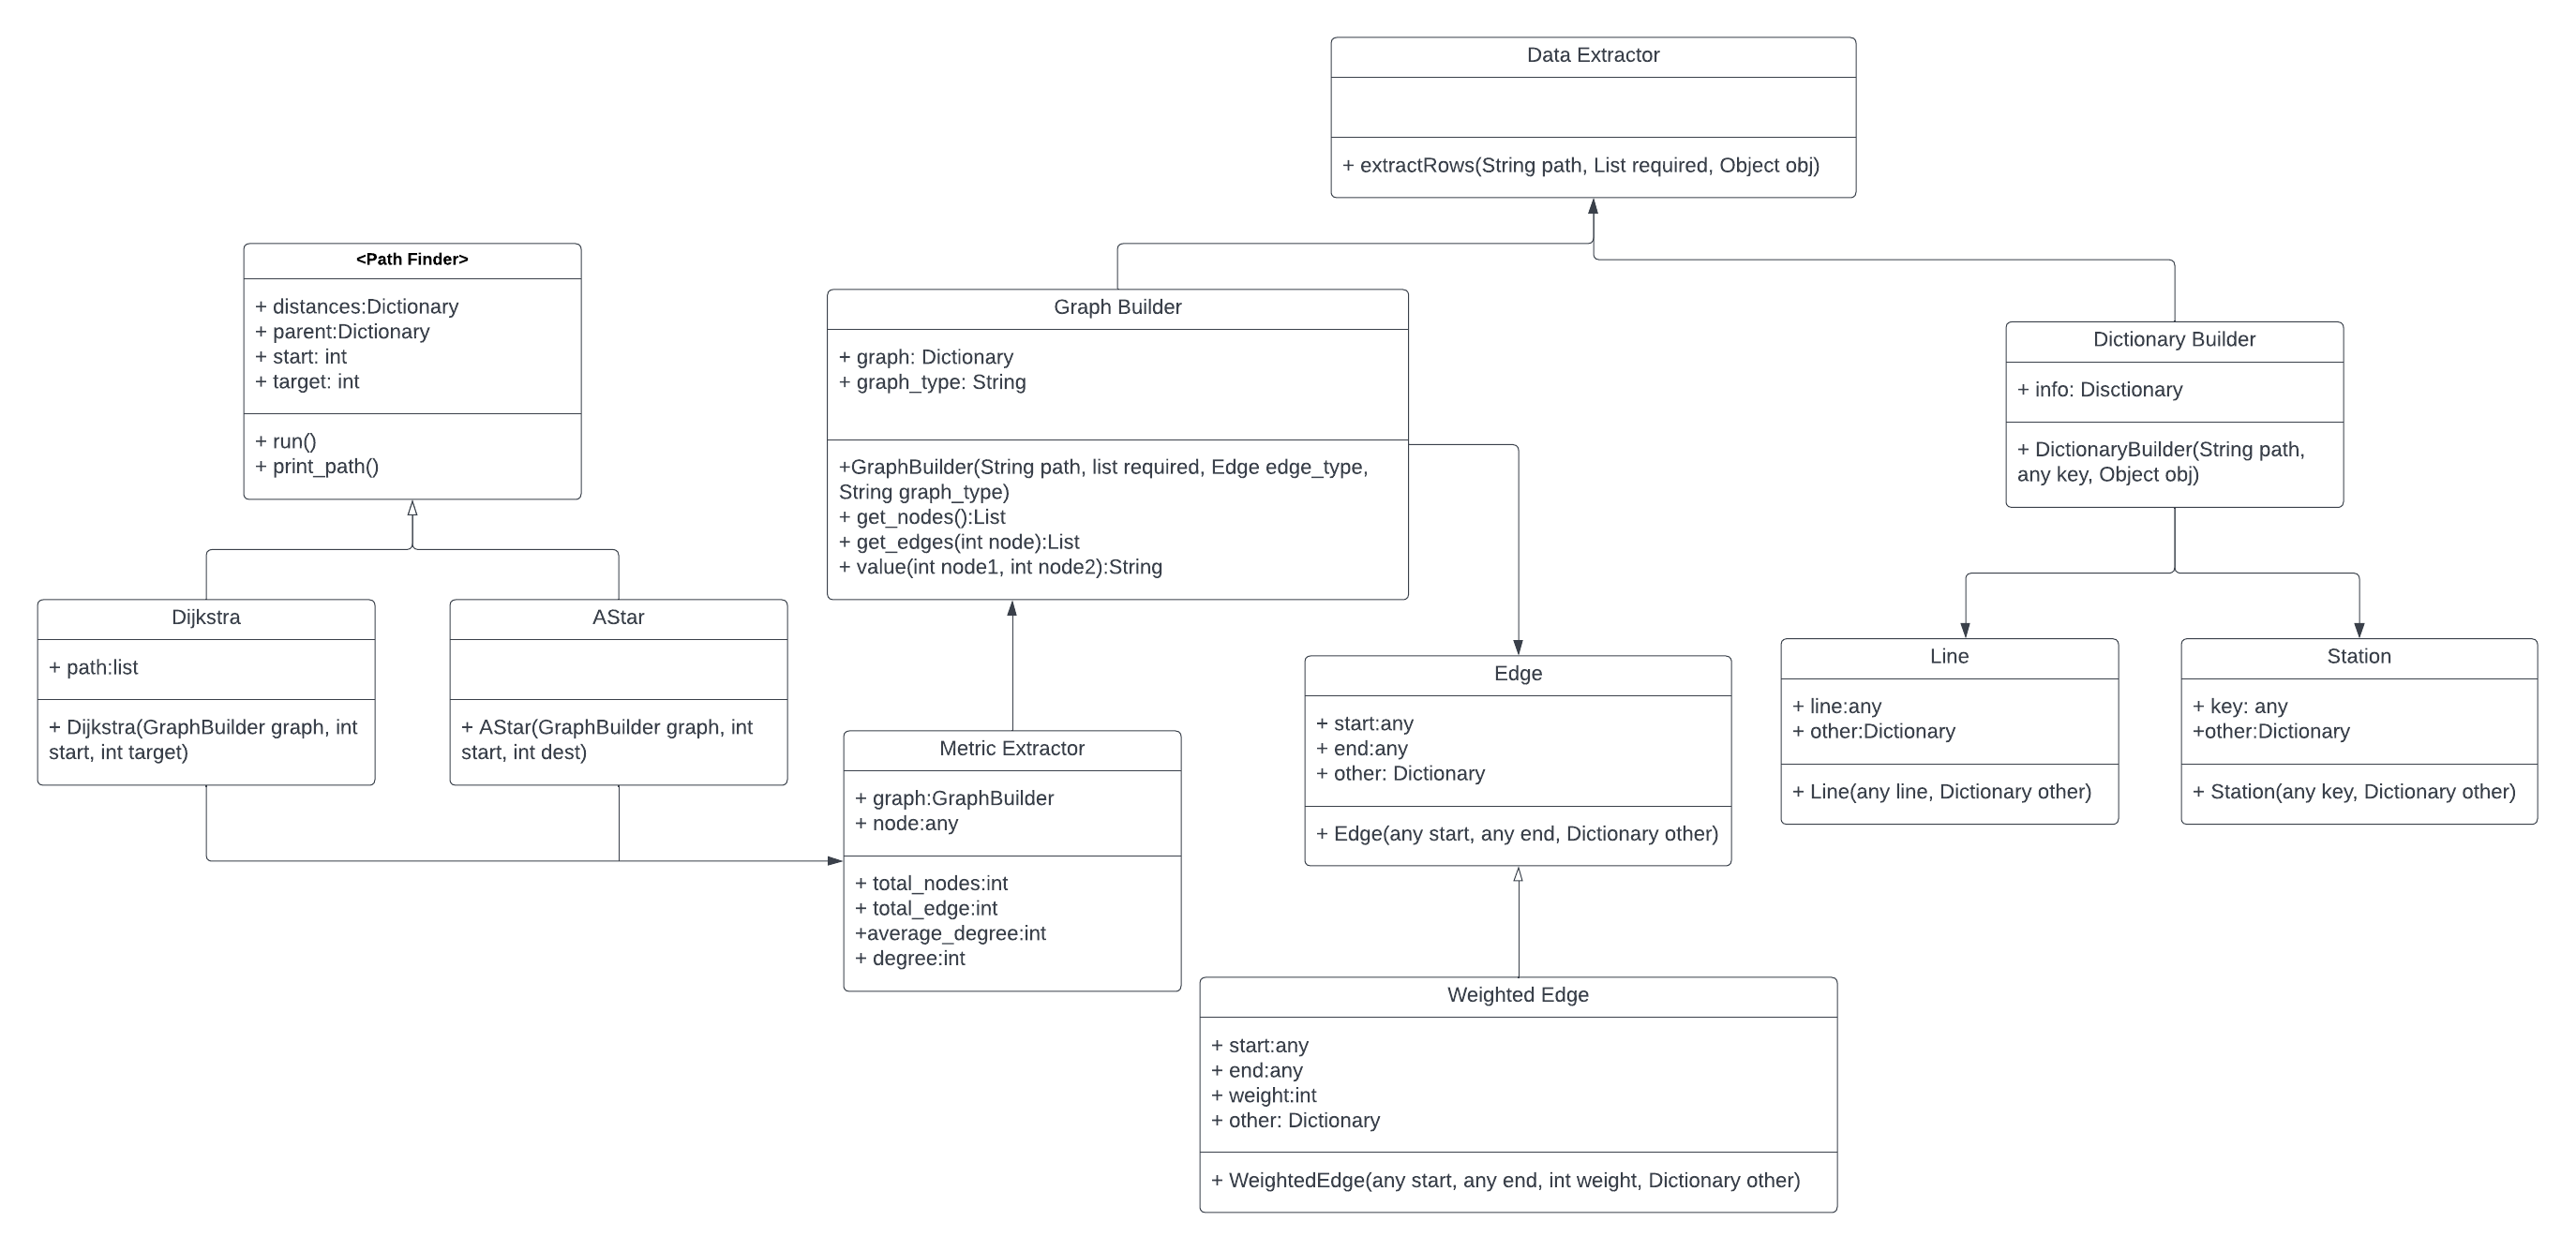

# Design Justification 

## Itinerary Structure Decision

### How to Deal with Paths of Equal Length/Weight

Our decision is to prioritize the number of lines taken to the final destination. If there are multiple paths to get to a station of the same weight, the path with the least number of transfers will be chosen, meaning the least number of lines. We are considering lines instead of number of connection as if number of connections are in the same line, this is not an inconvenience to the passenger and will not effect hassle or travel time. Switching lines at connections is where a passenger might face some trouble and so we will be limiting the number of lines needed to be taken to get to their final station. In the case of our Dijkstra algorithm, it will print out the shortest travel time of the path with the least number of connection lines as well as the path. We are also prioritizing that the number of transfers as more important than time to a certain degree. <br>

We implemented this by adding a little bit more weight to the path if the current line the passenger is on differs from the path we are currently checking. By adding `0.5` and not `1` will ensure that it does not affect the weight of all the connections but still big enough to have an effect of finding the shortest path. 

## Library Design 

2 KPIs:<br> # of operations (if statments in which we add to the distance list) <br> # of nodes visited (counting the number of nodes that are put into the PQ or check # of times while loops since they are the same condition)
<br><br>
Execution time

## `DataExtractor.py`

### Accepts Any File Type
We designed our graph library to accept any file type. If in the future, the library must now support Excel files, for example, all the developer has to do is make a new if statement to take the extension `xls` with the right considerations to the format and the rest of the library can still work. This also blends into singular responsibility as `DataExtractor.py`'s only job is to read the raw data from the source file and does not affect the process of other files.

### Doesn't Depend On Source File Headings*

The source file could have any number of different info/headings. For example, in `london.station.csv`, it could have a new heading `in service` which has a string value of either `yes` or `no`, our Data Extractor will work regardless. The order of the headings will also not matter and will still work. An example is if `london.station.csv` has the heading order mixed up as `station2, time, line, station1`. It will also work if the headings are in any language! This works because when you call the Data Extractor, it takes an array of required headings specified by the user. This is a trade off we had to make. To be able to take any new headings, no matter the order or language, we must assume that all the required headings are in the same file. If it doesn't, the program would not work. However, we decided in reality this case would be very rare. Usually, all the related and important info is in one place. 

### Data Can Be Used To Create a Graph or Disctionary 

When our Data Extractor reads the raw data, it can be used to create a multitude of different objects. It can be used to create a graph or Dictionary of any object if specified. We wanted to make it this way so the rest of the library would be able to still use the class. The Data Extractor should be able to format the data so all the other creation classes can call the same method, no matter the object. As a result we also added a `obj` attribute to accommodate for this use case.

## `GraphBuilder.py`

### Any Type of Graph with Any Type of Edge

We wanted to make our graph builder be able to create any graph of any edge type. This means being able to support directed, undirected, weighted and unweighted graphs. This is done by taking the desired graph type and edge type as parameters of the graph which is given when calling the class. The edge type will be used as input for the `DataExtractor.py` which will create the edge object to be used in creating the graph. The graph type will be used in a switch statement. Since directed and undirect graphs adjacency lists are differently created, we decided a switch stament till work best with readability and understanding of how the code works. 

### Dictionary to Store the Graph

We decided to store the graph which in essences is the adjacency list, in a dictionary. This is because, we found this would be the best way to organize the information and be able to access what we want, when we want easily, which makes the rest of the code more readable. We made the key, value pairs to be `node:[array of {set} values]`. Each set would have the other node connection with the weight if needed as an integer and the rest of the values which results in the form `[{node:[weight,'other info']}`. Although it may look confusing, it makes it a lot easier to handle duplicate information and makes reading the graph a lot cleaner. 

### Graph Specifics Attributes

We also calculated the number of nodes, edges of a node and weight of a node in the graph builder. Although we could have done so in the Metric Extractor, we decided to put these calculations in graph builder for the sake of readability. It makes more sense to have `graph.get_nodes()` than `MetricExtractor(graph).get_nodes()`. This was simply a choice of readability.

## `MetricExtractor.py`

We have decided to store MetricExtractor in _dataset as this is where the csv files are held. Like the csv files, the content of the metricExtractor and the calculations it can compute can change, we thought this would be the best fit for this file. The MetricExtractor calculates important data that can be used in any files. For the London Station Graphs, specific metrics include `total_nodes()` and `total_edges` of the entire graph, `degree()` of each node, `average_degree()` of the total graph, and finally calculating the node 'degree_distribution()' of the graph which is used to plot a graph in the report above. We tried to implement every situation possible while keeping the class open/closed as possible. <br> In the average degree's function, depending on the specified edge type (undirected or directed), average degree is calculated using two different methods for accurate computations and to consider in/outgoing edges. <br>
<br>
The class structure takes in nodes and graph. For now, our Application Deals with just Weighted Undirected Graphs. In the future however, if graph type changes, our metricExtractor is able to account for that and still perform as is with no changes needed. More metrics needed in the future can easily be added in this class by implementing a new function independent of the rest of the application. 

## PathFinders Interface

When coding our path finder algorithms, we noticed they both had `run()` and `print_path()`. To make things align with dependency inversion, we decided to create an interface to capture the basis of the algorithms. This way, any new algorithms added will also follow this format, making things more consistent and more open closed.

## File Structure

We decide to split all the files into different folders. We will have a Library folder and a PathFinders folder. This makes organizing files easier when grouped. This also helps with importing files into other files. Since importing needs to state the path, the folder must also be stated, making readability much easier.<br>
We also originally had all the graph objects, `Edge, Line, Station` in a Graph Objects folder. However, we decided to merge all these classes into one file. Since the graph objects are used throughout the entire project, not like the library, it made more sense to put all three objects into one file. The topic of single responsibility also came up, questioning if doing so would violate the principle. Upon further inspection, it actually didn't. The classes are all still independent of each other. They are just in the same place. This also makes importing easier since we only need one import instead of three or more.

## Graph Objects

All the graph objects follow a similar structure. There are the required attributes that are required. As such, they can be directly referenced anywhere. There is also a directory of all the other headings and data that is still present in the source file but not directly referenced as a parameter in the object creation. By inputting the other data as a dictionary allowed us to dynamically set the rest of the data into their rightly named headings. This way we would be able to accommodate for any amount of new data outside of the required ones to make the graph/dictionary builder work.

### `Edge.py`

Since there are 2 different types of edges, we incorporated polymorphism. The parent would be a unweighted edge and the child would be a weighted edge. We found that creating edges this way rather than having two separate edge classes would make more sense from a readability stand point and also a logic stand point since they are related objects.

# Benchmarking

## KPI: Execution Time

AStar Execution Time:  [0.0020780563354492188, 0.007427692413330078, 0.002752542495727539, 0.004987955093383789]
Dijkstra Execution Time:  [0.40236926078796387, 0.023685455322265625, 0.29453396797180176, 0.010191917419433594]


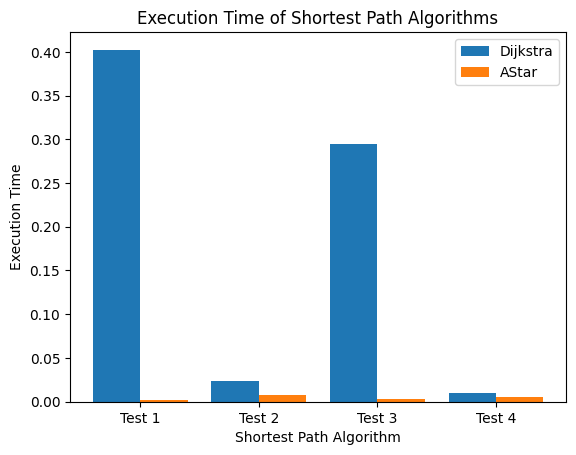

In [1]:
from random import *
import time
import matplotlib.pyplot as plt
import numpy as np 
from Library.GraphBuilder import *
from PathFinders.AStar import *
from GraphObjs import *
from PathFinders.Dijkstra import *


graph = (GraphBuilder('_dataset/london.connections.csv',['station1','station2','time'],WeightedEdge,'undirected'))

start_list = []
for i in range(0, 4):
    # any random numbers from 0 to 1000
    start_list.append(randint(1,279))

end_list = []
for i in range(0, 4):
    # any random numbers from 0 to 1000
    end_list.append(randint(1,279))

AStarExecutionTime= []
for i in range(0,4):
    start_node = start_list[i]
    target_node = end_list[i]
    graph = (GraphBuilder('_dataset/london.connections.csv',['station1','station2','time'],WeightedEdge,'undirected'))
    start = time.time()
    A_Algo = AStar(graph,start_node,target_node,'_dataset/london.stations.csv',['id'],Station,'latitude','longitude')
    distances,parent,count = A_Algo.run()
    end = time.time()
    AStarExecutionTime.append(end - start)
print("AStar Execution Time: ", AStarExecutionTime)

DijkstraExecutionTime= []
for i in range(0,4):
    start_node = start_list[i]
    target_node = end_list[i]
    start = time.time()
    Algo=Dijkstra(graph, start_node,target_node)
    Algo.run()
    end = time.time()
    DijkstraExecutionTime.append(end - start)
print("Dijkstra Execution Time: " , DijkstraExecutionTime)

X = ["Test 1" , "Test 2", "Test 3", "Test 4"]
X_axis = np.arange(len(X))
  
plt.bar(X_axis -0.2,DijkstraExecutionTime, 0.4, label = 'Dijkstra')
plt.bar(X_axis + 0.2, AStarExecutionTime, 0.4, label = 'AStar')
  
plt.xticks(X_axis, X)
# plt.yticks(np.arange(0, 6, 0.02), label=" ")
plt.xlabel("Shortest Path Algorithm")
plt.ylabel("Execution Time")
plt.title("Execution Time of Shortest Path Algorithms")
plt.legend()
plt.show()


**Dijkstra Execution Time:** <br>
<br>
**AStar Execution Time:** <br>
<br>
The first KPI used to measure the algorithms is execution time. This is because it is important to measure execution time to compare and evaluate performance as it helps to see which algorithm is considered more efficient AND help to make proper adjustments to our program. In this case, if one algorithm can perform the same results than the other with less resources and time, we will value this. If both execution times are fairly similar it helps us to evaluate other key points such as "is implementing heuristic function in the AStar algorithm more valuable than the extra seconds it adds to the execution time than Dijkstra's Algorithm Time." <br>
<br>

The Benchmark above, runs both Dijkstra and AStar 4 times, from one random station to another. <br>
An example of runtime from this program is: <br>
<br>
AStar Execution Time:  [5.620431900024414, 5.48426628112793, 1.330350637435913, 1.1496772766113281]<br>
Dijkstra Execution Time:  [0.6449999809265137, 0.08809709548950195, 0.028410673141479492, 1.6502776145935059]<br>
<br>
AStar Execution Time:  [0.8724520206451416, 7.781271457672119, 5.364691972732544, 0.8851761817932129]<br>
Dijkstra Execution Time:  [0.016152620315551758, 0.6352777481079102, 0.0387721061706543, 0.620105504989624]<br>
<br>

AStar Execution Time:  [5.184356689453125, 6.64893651008606, 7.954535722732544, 0.7518844604492188]<br>
Dijkstra Execution Time:  [0.032896995544433594, 0.733957052230835, 3.121213912963867, 0.02607250213623047] <br>
<br>
From looking at these datapoints, its important to notice that although not all the time, AStar's Execution time has been sigificantly larger than Dijkstra's runtime. This could be caused by the extra heuristic added, as well as our condition of adding more value to distance if there is another way to get to a station with less transfers. Calculating and implementing this heuristic to take an account the stations longitude and latitude coordinates has caused execution time to be greater. As well it seems that the report ipynb file is also increasing the execution time of the AStar Algoirthm due to an unknown reason as when testing benchmarks on an IDE like Visual Studio Code, the average execution time is around 2.0 seconds, whereas here, the program can reach up to a whopping 9.0 or higher execution time. Further investigation is needed to determine the cause, however overall with these numbers we can conclude that Dijkstra has a shorter execution time when it comes to finding shorest path. <br>
<br>
One KPI is not enough to make a lot of discussions, and analysis performance, this we have also chosen to determine the number of nodes visited by each Algorithm to find shortest path.<br>
<br>

## Number of Nodes Visited

Number of Nodes Visited in AStar:  [15, 127, 144, 251]
Number of Nodes Visited by Dijkstra:  [337, 338, 325, 354]


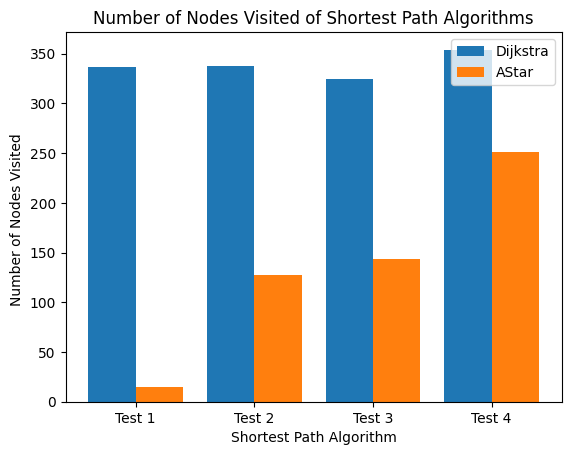

In [2]:
from random import *
import time
import matplotlib.pyplot as plt
from Library.GraphBuilder import *
from PathFinders.AStar import *
from GraphObjs import *
from PathFinders.Dijkstra import *
import numpy as np 

graph = (GraphBuilder('_dataset/london.connections.csv',['station1','station2','time'],WeightedEdge,'undirected'))

start_list = []
for i in range(0, 4):
    # any random numbers from 0 to 1000
    start_list.append(randint(1,279))

end_list = []
for i in range(0, 4):
    # any random numbers from 0 to 1000
    end_list.append(randint(1,279))

AStar_Nodes_Visited= []
for i in range(0,4):
    start_node = start_list[i]
    target_node = end_list[i]
    A_Algo=AStar(graph, start_node,target_node,'_dataset/london.stations.csv',['id'],Station,'latitude','longitude')
    distances, parent, counter = A_Algo.run()
    AStar_Nodes_Visited.append(counter)
print("Number of Nodes Visited in AStar: ", AStar_Nodes_Visited)

Dijkstra_Nodes_Visited= []
for i in range(0,4):
    start_node = start_list[i]
    target_node = end_list[i]
    start = time.time()
    Algo=Dijkstra(graph, start_node,target_node)
    counter = Algo.run()
    Dijkstra_Nodes_Visited.append(counter)
print("Number of Nodes Visited by Dijkstra: " , Dijkstra_Nodes_Visited)


X = ["Test 1" , "Test 2", "Test 3", "Test 4"]
X_axis = np.arange(len(X))
  
plt.bar(X_axis -0.2,Dijkstra_Nodes_Visited, 0.4, label = 'Dijkstra')
plt.bar(X_axis + 0.2, AStar_Nodes_Visited, 0.4, label = 'AStar')
  
plt.xticks(X_axis, X)
# plt.yticks(np.arange(0, 6, 0.02), label=" ")
plt.xlabel("Shortest Path Algorithm")
plt.ylabel("Number of Nodes Visited ")
plt.title("Number of Nodes Visited of Shortest Path Algorithms")
plt.legend()
plt.show()

**Number of Nodes Visited** <br>
<br>
The second KPI measured is Number of Nodes Visited. Using this KPI we can check if the algorithms are performing in the most optimal way and visiting the least possible number of nodes needed in order to determine the shortest path. This also helps for us to check how our algorithms is implementing our "shortest path considerations" where we choose the path with the least number of transfers if it falls under a threshold value exceeding time of the shortest path (in terms of connections). It helps to check if our algorithms visits more paths than needed.
<br>

The Benchmark above, runs both Dijkstra and AStar 4 times, from one random station to another. <br>
An example of Number of Nodes Visited from this program is: <br>

Number of Nodes Visited in AStar:  [130, 117, 134, 120]<br>
Number of Nodes Visited by Dijkstra:  [332, 324, 325, 327]<br>

Looking at the difference between the two algorithms, it looks like Dijkstra visits almost double the amount than AStar does. Its important to take this in to consideration when determining which algorithm is more suited to be used. For example, although A Star takes a longer execution time because of its heuristic,the overall nodes visited in algoritthm is smaller than Dijkstra. Dijkstra is able to compute and visit nodes faster to find shortest path, wheras AStar takes it time to visit only the nodes that are needed. This looks more beneficial as it takes more considerations to help determine shortest path. 

# Work Contribution

With setting up the library, Jennifer developed the csv reader, graph builder and objects. These were made to be independent of each other. Parisha started with building a basic frame of the object types for the graph which was later extended and made more open closed by Jennifer. <br><br>
In the shortest path section, we decided on the itinerary structure together and then split the job of creating the algorithms. Jennifer took implementing Dijkstra’s and Parisha took implementing A*. After both algorithms were implemented, we both thought about possible benchmarks we could use.<br><br>
As Jennifer implemented much of the library components, Parisha took on the report and metrics extractor portion of week one. She loaded the graph from our library, computed the metrics and created plot for the node distribution of the graph. Further updates on the report were also split. Jennifer worked on the UML which was also checked over by Parisha. Parisha implemented the programming of the benchmarks, as well as the analysis of the results and importance of the KPIs. The design justification was split to who ever coded what would write a basis. After, we would read each other works to make sure the ideas were articulated correctly and included mention of SOLID principals.
We tired to split it up fairly and if someone did more work, the other would take on other responsibilities. 

# Self Reflection

## Jennifer

### Backwards: Have	you	done	a	similar	kind	of	work	in	the	past?

In terms of creating a library on my own, no. I haven't done something like this in the past. Although, during my co-op, I worked on a project where they really emphasized file structure and organization. This helped me organize my own project purposefully. I also haven't done any applications of algorithms before. In previous classes, I only understood how the algorithms worked. During my co-op I also did not do anything with algorithms.

### Inward: How do you feel about this piece of work? What parts do you particularly like? Dislike? Why?

I felt like this lab was definitely a rough introduction to the course. Since many of us struggle with the open ended nature of the lab, we were all lost from the start. If the lab guided us a bit more, I think it would have been a much better learning experience, where we could both learn and get a feel for how open ended nature of both the course. Overall, I really like the content of the lab. I enjoyed the struggle of finding the answers and making decisions about how to implement things and how the basics of algorithms are applied. However, due to the fact that I wanted to make my library as open-closed as possible, I ended up always going back to edit my library. It felt like I was in limbo with trying to get the library to be as best as I can make it. I think this was an effect of the open ended nature of the lab. I didn't know when to stop because I didn't know when was enough. Although the lecture seemed to have some relevance to the labs, the connection was still not strong enough for me. Which I think also lead to some struggling with just understanding what I needed to do. Overall, I am proud of my work during this lab even though its not as perfect as I would like it to be, but that is due to the deadlines.

### Outward: What	is	the	one	thing	you	particularly	want	people	to	notice	about	your	work?

One thing I want people to notice is my attention to detail with implementing the library to be able to handle any type of graph and edge. How much thought I put into making sure my library was as open-closed as possible. I implemented the data extractor to be able to take different types of files by just adding a new case statement. I tried really hard to make things single responsibility and to group methods in a way that makes sense. This way it would make readability a lot more clear. I spent most of my time making sure these principles are abided by than actually coding the content of the lab. I hope my efforts in that will be noticed in my work. 

### Forward: What	would	you	change	if	you	had	the	chance	to	do	this	project	over	again?

One think I would change if I could do this project over again is to set harder limits for myself. I didn't realize the fact that this is still an deadline bounded lab. I don't have time to check off all the boxes I have for myself. I needed to make sacrifices, there was no way I could make the lab as perfect as I wanted it to be. If I were to do this project again, I would stick to the hard deadlines and try to limit myself from going back. This way I would still move forward while forcing myself to think about most of the design before actual implementation.  

## Parisha

### Backwards: Have	you	done	a	similar	kind	of	work	in	the	past?

In the past, I have learnt about Algorithms such as Dijkstra and other shortest paths in our Algorithms and Data Structures course. We learnt about how to implement these and have a good understanding on how it works. However, I have not used these algorithms extensively aside from writting the algorithms as exactly as taught (the base case) This project has really allowed us to apply our knowledge of algorithms and use it in a real scenario application. As well, In our Software Development Course, we were given the tasks to program proper code uing Software Designs. This was a big part to this project as well and although I do not have experience in writing a full library, previous experience in writing class modules with SOLID principles in mind, really helped with this lab. 

### Inward: How do you feel about this piece of work? What parts do you particularly like? Dislike? Why?

I liked this lab because it allowed us to apply several things we learnt in other courses such as implementing Shortest Path algorithms and having to consider SOLID principles when coding the library. This project showed one scenario of where we can use our education in real life! I however did not like how this lab was very open-ended. Although most tasks we work on as Engineers will be just that, starting this course with such a large and open ended projected was very overwhelming. We had no time to review any concepts that we need for the lab, and was using python which most have us have not touched in a while. There was a large learning curve however I did like how it pushed us to understand each and every concept and then apply it. I learnt a lot from doing this lab which will most definitely be applied in the future. I think this work gave our class a first real world application and learnt a lot about adaptation and importance of testing from this.

### Outward: What	is	the	one	thing	you	particularly	want	people	to	notice	about	your	work?

One thing I would like people to notice about my work is the ablity to adapt known code ( like AStar and Dijkstra) to implement our shortest path algorithm in a valuable way for our london network system. For example we chose to prioritize the number of transfers of a path if it is within a threshold time of the shortest path ( less times) but more train transfers. We also made sure to make our code adaptable and is usuble for anytime of Graph in the future. For example, although the London Network Graph is a undirected weighted graph, we have implemented the library to be able to process Direcred unweighted graphs as well. 

### Forward: What	would	you	chance	if	you	had	the	chance	to	do	this	project	over	again?

If I had a chance to do this lab again, I would make sure to take a good amount of time to plan and write down a way to go about the project and stick to it. My partner and I were not very confident in the way we first programmed our library and so we were always changing it around which in result affected much of the code and used up a lot of time. I think it is because we wanted to make this as open and closed as possible and we did not have a good understanding of what that entailed when we dived into the project right away. Next time we should take more time on brainstorming and stick to a strong plan. 